In [1]:
!pip install missingno

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [3]:
df = pd.read_csv('MissingMigrants-Global-2019-12-31_correct.csv.zip', compression='zip')
df.shape

(5987, 20)

In [4]:
df.dtypes

Web ID                                   int64
Region of Incident                      object
Reported Date                           object
Reported Year                            int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Dead and Missing                   int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location Description                    object
Information Source                      object
Location Coordinates                    object
Migration Route                         object
URL                                     object
UNSD Geographical Grouping              object
Source Quality                           int64
dtype: object

In [5]:
df.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,52673,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,11.0,NaN,NaN,NaN,Hypothermia,Unspecififed location off the coast of Algeria,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,https://bit.ly/2FqQHo4,Uncategorized,1
1,52666,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Presumed drowning,"Recoverd on Calamorcarro Beach, Ceuta",El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,https://bit.ly/39yKRyF,Uncategorized,1
2,52663,East Asia,"December 27, 2019",2019,Dec,5.0,NaN,5,NaN,NaN,3.0,NaN,Unknown,"Bodies found on boat near Sado Island, Niigata...","Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",NaN,"http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...",Eastern Asia,3
3,52662,Middle East,"December 26, 2019",2019,Dec,7.0,NaN,7,64.0,NaN,NaN,NaN,Drowning,"Van lake near Adilcevaz, Bitlis, Turkey","EFE, BBC, ARYnews","38.777228612085, 42.739257582031",NaN,"http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...",Western Asia,3
4,52661,Middle East,"December 24, 2019",2019,Dec,12.0,NaN,12,NaN,NaN,NaN,NaN,Air strike,"Al-Raqw market in Saada, Yemen","UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",NaN,"http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...",Western Asia,4


In [6]:
#print(f"Columns with at least one nan value: {df.isna().any(0).sum()}")
#print(f"Rows  with at least one nan value: {df.isna().any(1).sum()}")

In [7]:
df.isna().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             225
Minimum Estimated Number of Missing    5411
Total Dead and Missing                    0
Number of Survivors                    5073
Number of Females                      4929
Number of Males                        2701
Number of Children                     5234
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        3056
URL                                    2177
UNSD Geographical Grouping               46
Source Quality                            0
dtype: int64

## missinno library

### Matrix

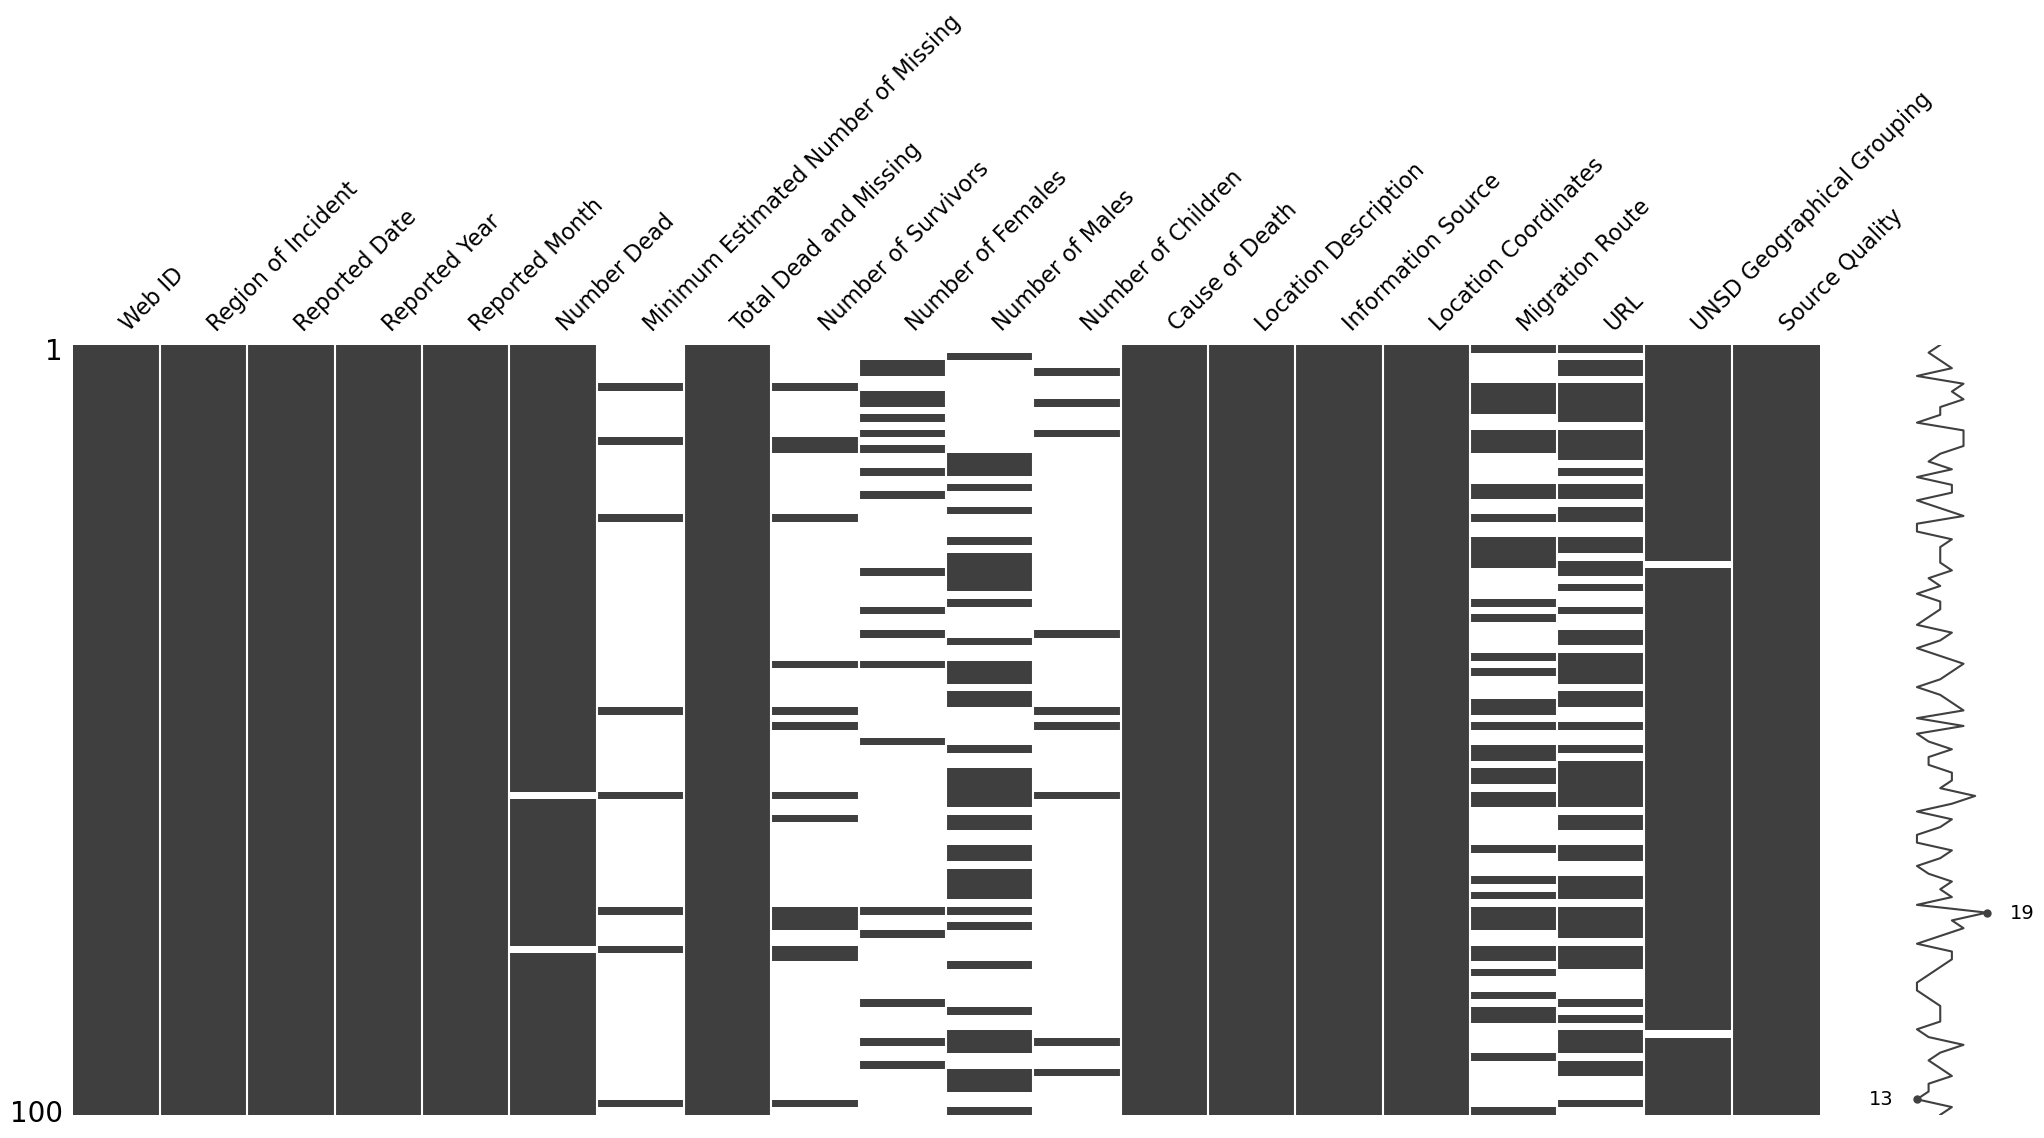

In [8]:
msno.matrix(df.sample(100));

### Bar

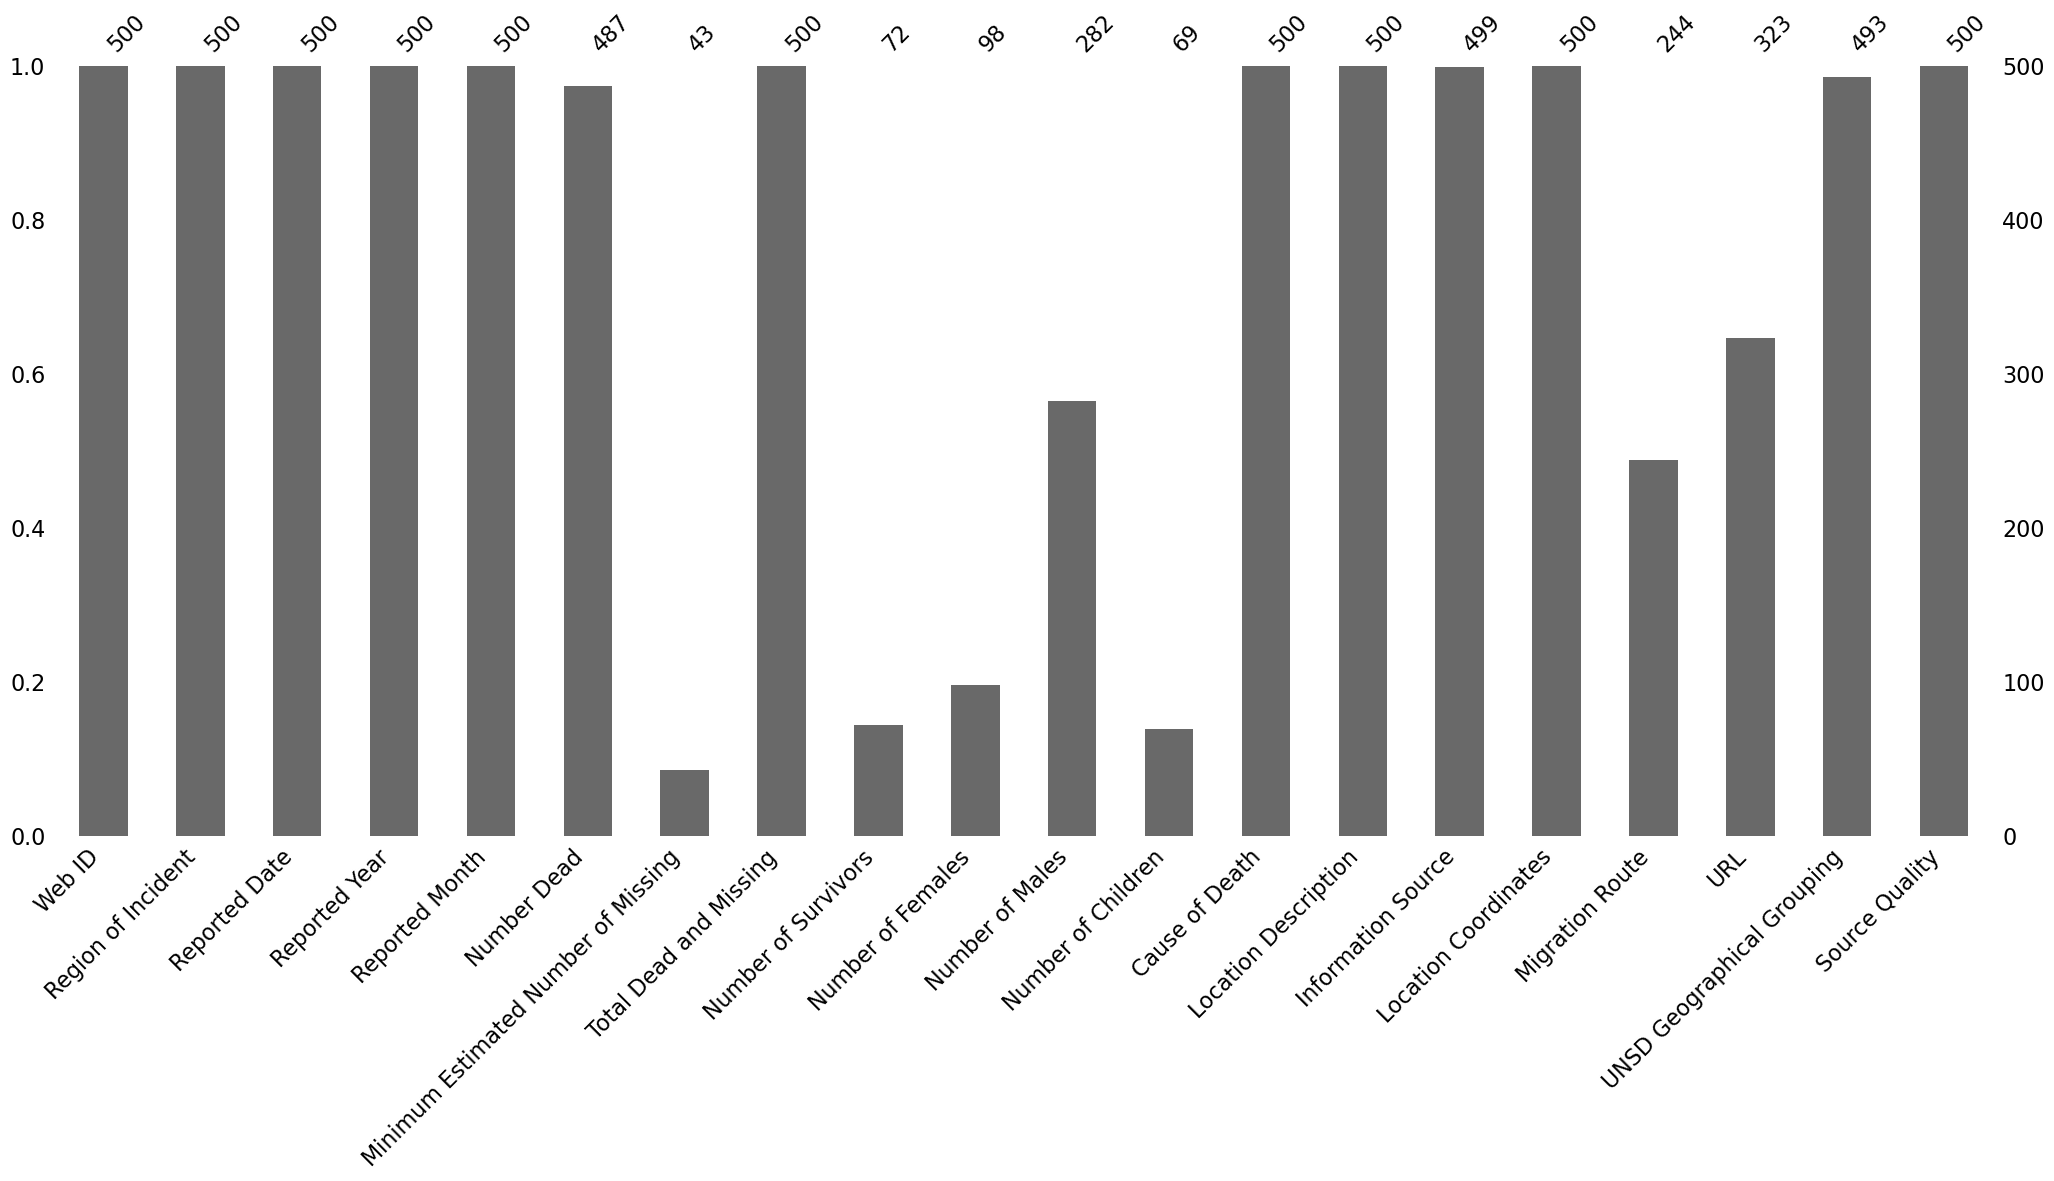

In [9]:
msno.bar(df.sample(500));

### Heatmap

<Axes: >

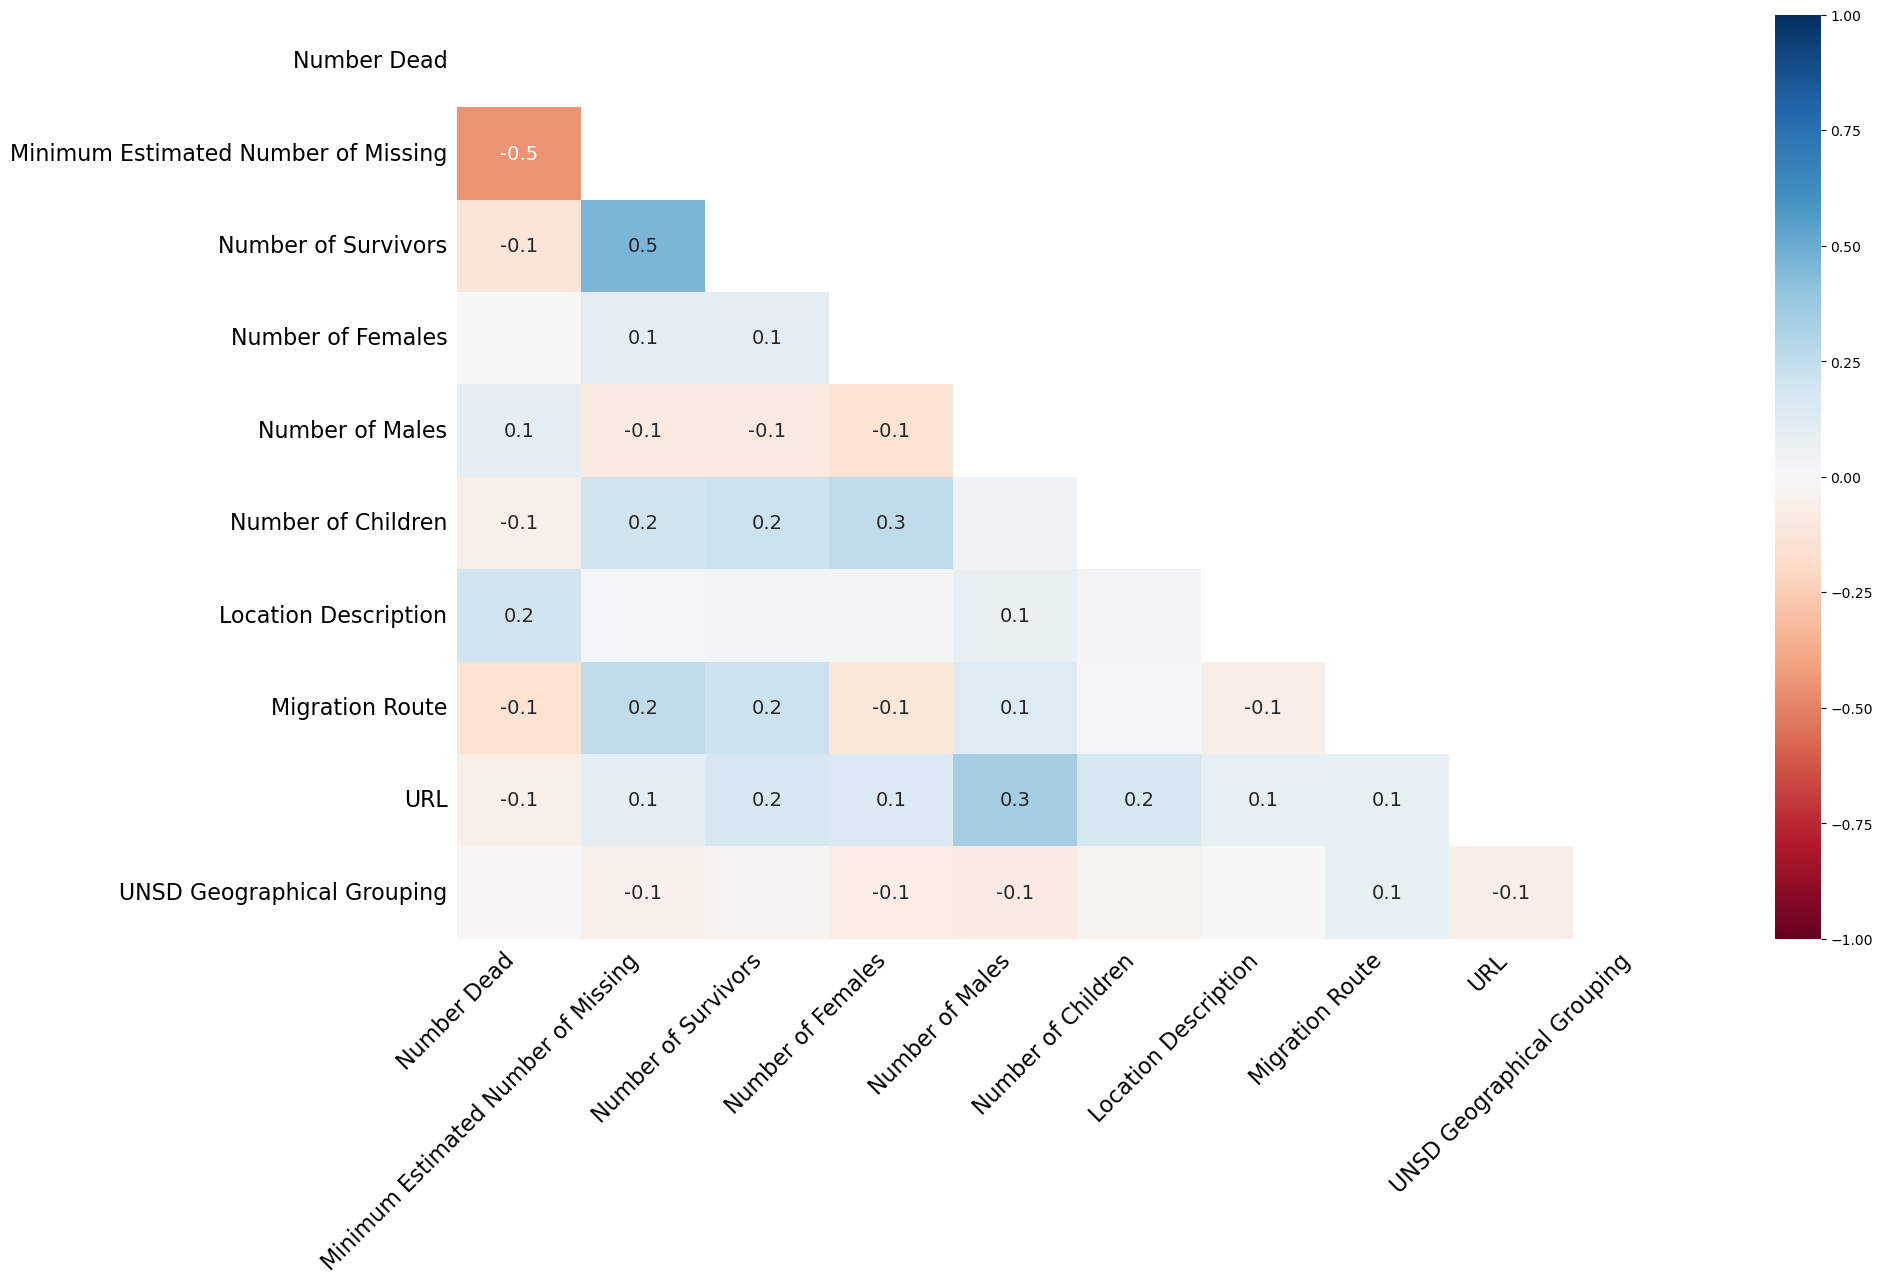

In [10]:
msno.heatmap(df.sample(500))

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

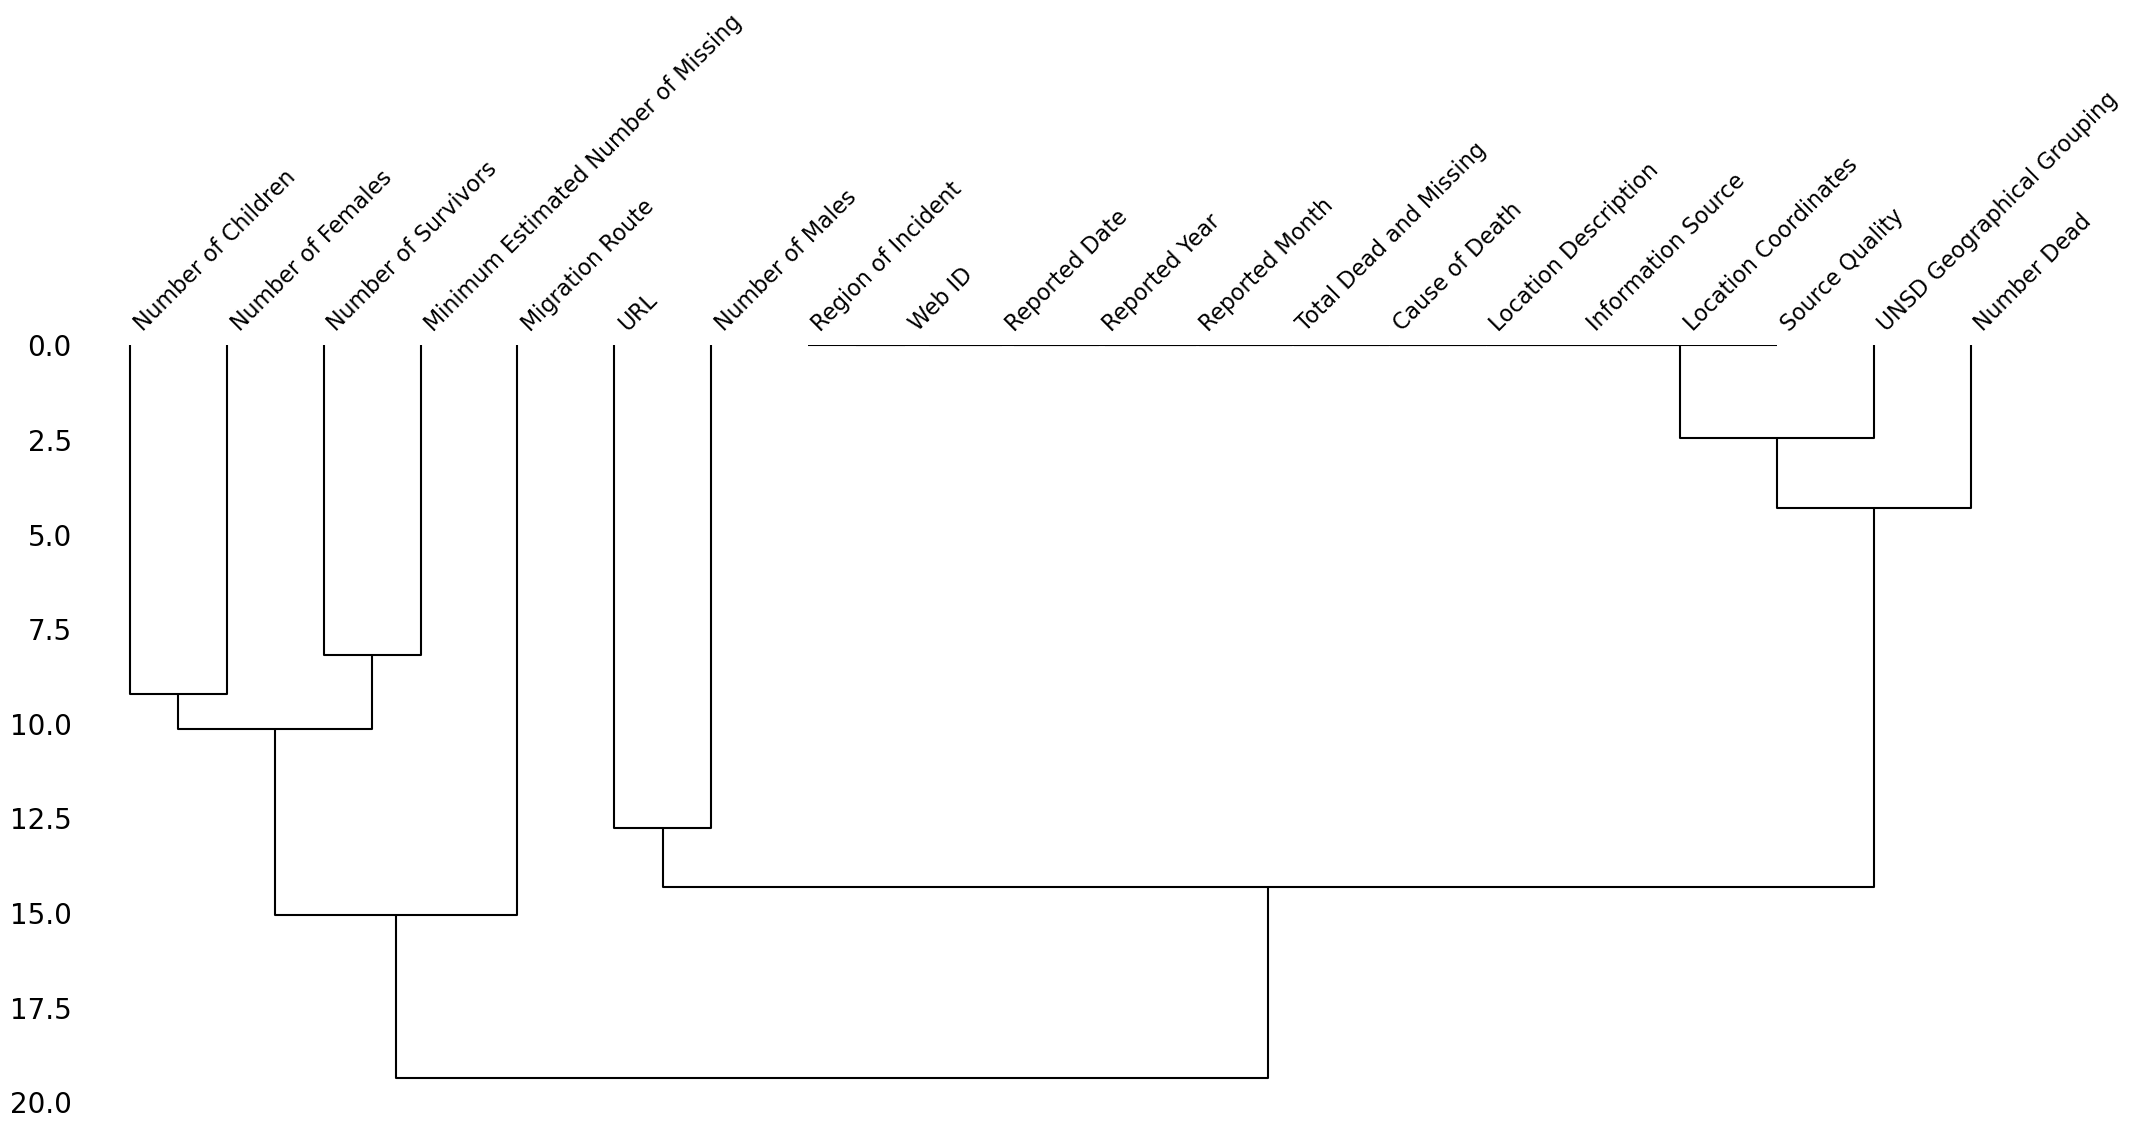

In [11]:
msno.dendrogram(df.sample(500));

Same can be done with seaborn and matplotlib (too much extra work)
refer https://harvard-iacs.github.io/2021-CS109A/lectures/lecture09/notebook/

In [12]:
def get_data():
    return pd.DataFrame(
        data={
            'A': [1, 2, 3, np.nan, np.nan, 6],
            'B': [1, -1, 1, -1, 1, np.nan],
            'C': [1, 2, np.nan, 8, 16, 32],
            'D': ['male', 'female', 'male', 'female', None, 'male'],            
            'E': ['red', 'blue', 'red', 'green', None, 'yellow'],}
        
    )

df = get_data()
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,NaN,male,red
3,NaN,-1.0,8.0,female,green
4,NaN,1.0,16.0,None,None
5,6.0,NaN,32.0,male,yellow


In [13]:
# used to plot original series with a new one where we already handled missing data
def plot_compare(df, column, title=''):
    
    org_df = get_data()
    nans = org_df.index[org_df[column].isna()]

    fig, axes = plt.subplots(1, 2, figsize=(16,2))

    org_df[[column]].plot(marker='o', ms=10, lw=0, ax=axes[0])
    if len(nans) > 0:
        for x in nans:
            axes[0].axvline(x=x, lw=1, ls='dashed', label=f'NaN: {x}')
    axes[0].set_title('original series')
    
    df[[column]].plot(marker='o', ms=10, lw=0, ax = axes[1])
    if len(nans) > 0:
        df.loc[df.index.isin(nans), column].plot(marker='o', ms=10, lw=0, color='orange', ax = axes[1])
        for x in nans:
            axes[1].axvline(x=x, lw=1, ls='dashed', label=f'NaN: {x}')    
    if len(title) > 0:
        title = f'new series ({title})'
    else:
        title = 'new series'
    axes[1].set_title(title)
    
    plt.suptitle(f'column {column}')
    plt.show()

### Method: dropna()

In [14]:
df = get_data()
df = df.dropna(axis=0)
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue


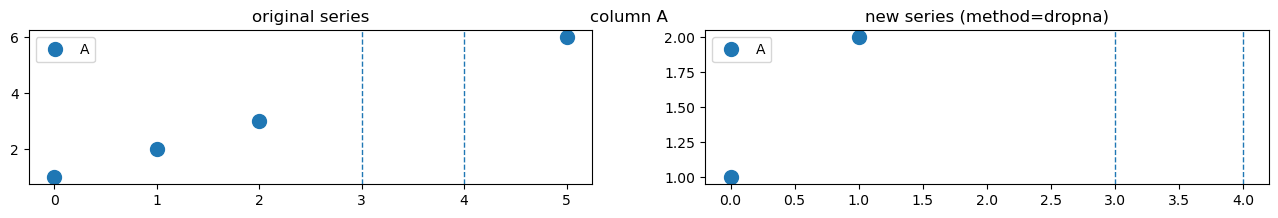

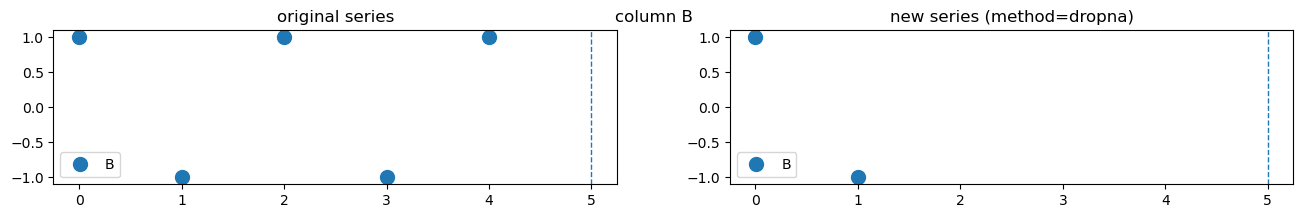

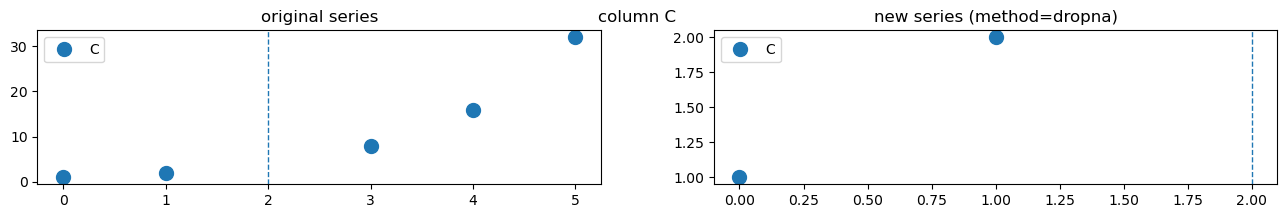

In [15]:
plot_compare(df, 'A', 'method=dropna')
plot_compare(df, 'B', 'method=dropna')
plot_compare(df, 'C', 'method=dropna')

### fillna() with mean

In [16]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].mean())
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,11.8,male,red
3,3.0,-1.0,8.0,female,green
4,3.0,1.0,16.0,None,None
5,6.0,0.2,32.0,male,yellow


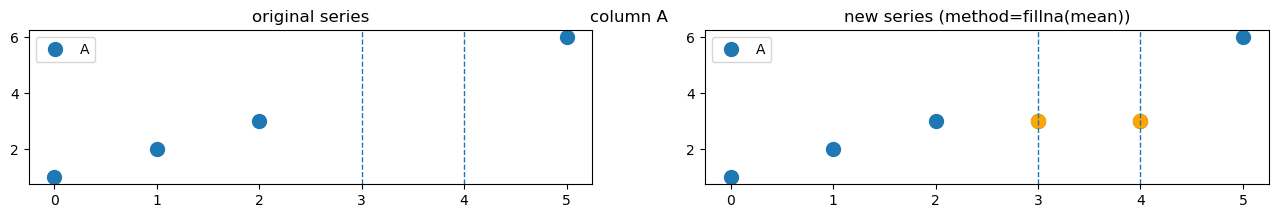

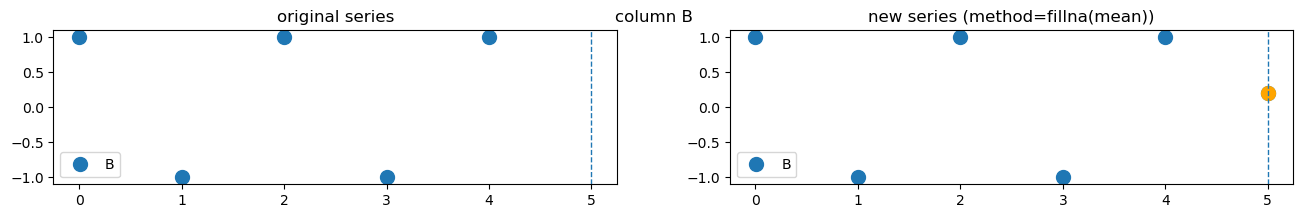

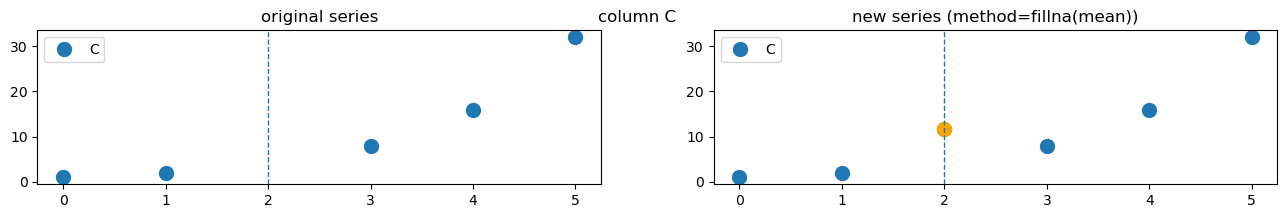

In [17]:
plot_compare(df, 'A', 'method=fillna(mean)')
plot_compare(df, 'B', 'method=fillna(mean)')
plot_compare(df, 'C', 'method=fillna(mean)')

### fillna() with median

In [18]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].median())
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,8.0,male,red
3,2.5,-1.0,8.0,female,green
4,2.5,1.0,16.0,None,None
5,6.0,1.0,32.0,male,yellow


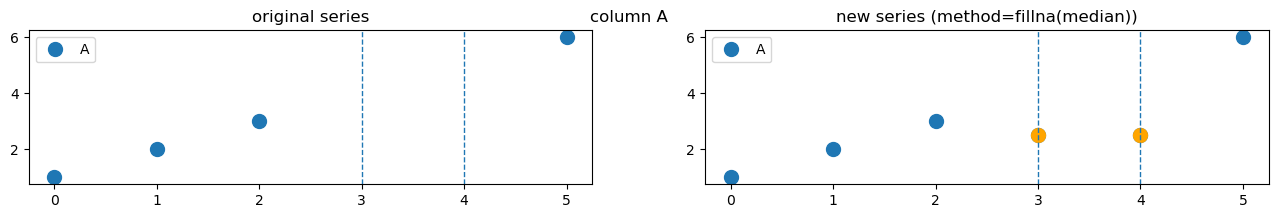

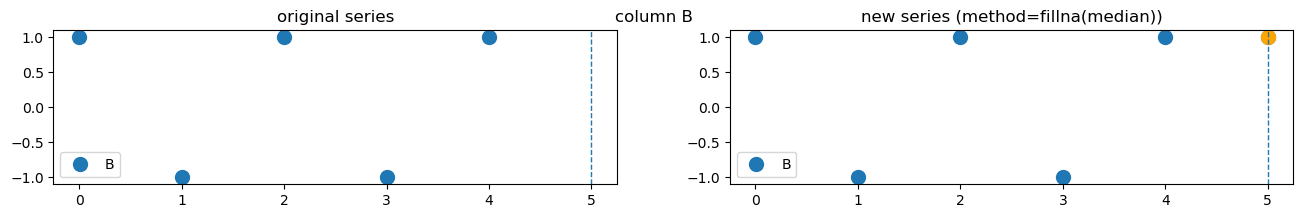

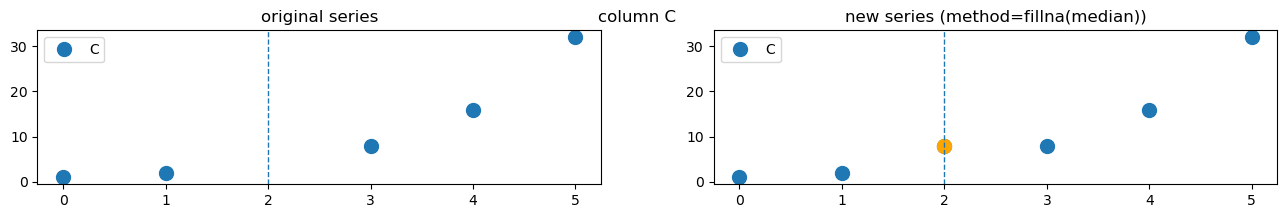

In [19]:
plot_compare(df, 'A', 'method=fillna(median)')
plot_compare(df, 'B', 'method=fillna(median)')
plot_compare(df, 'C', 'method=fillna(median)')

In [20]:
df = get_data()
nans = df.isna()

# helper to highligh original NaN cells
def highlight_nans(s):
    return np.where(nans[s.name], 'color:white;background-color:black;text-align:center', '')

df.style.format(formatter=None, na_rep='').apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,,male,red
3,,-1.000000,8.000000,female,green
4,,1.000000,16.000000,,
5,6.000000,,32.000000,male,yellow


### forward filling
the value of the previous cell

In [21]:
df_ffill = df.fillna(method='ffill')
df_ffill.style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,2.000000,male,red
3,3.000000,-1.000000,8.000000,female,green
4,3.000000,1.000000,16.000000,female,green
5,6.000000,1.000000,32.000000,male,yellow


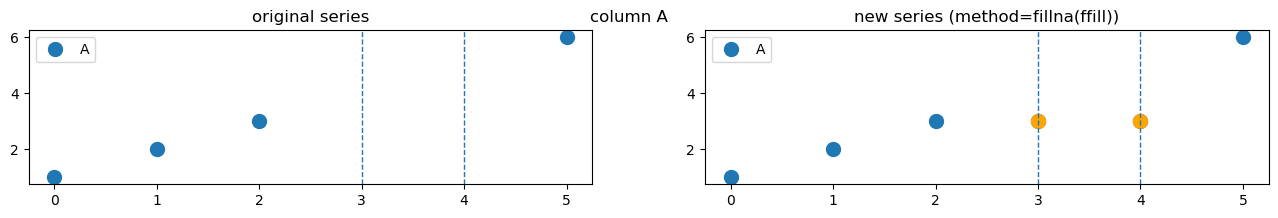

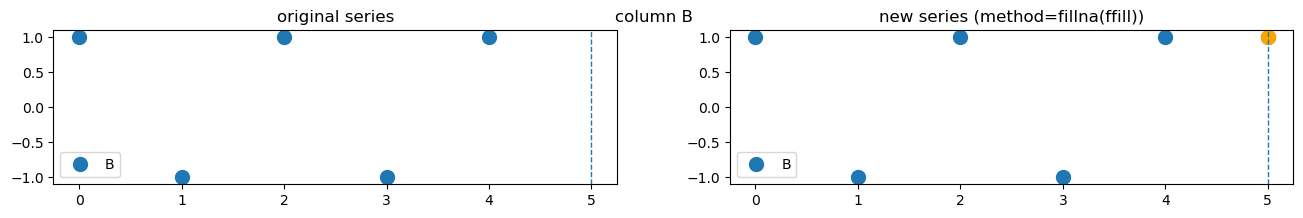

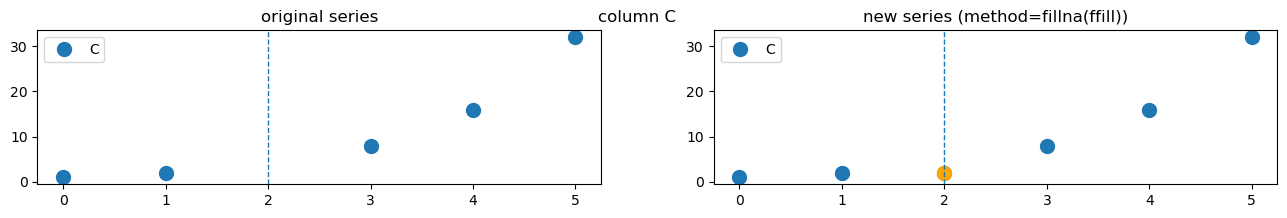

In [22]:
plot_compare(df_ffill, 'A', 'method=fillna(ffill)')
plot_compare(df_ffill, 'B', 'method=fillna(ffill)')
plot_compare(df_ffill, 'C', 'method=fillna(ffill)')

### backward filling
vale of the next cell

In [23]:
df_ffill = df.fillna(method='bfill')
df_ffill.style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,8.000000,male,red
3,6.000000,-1.000000,8.000000,female,green
4,6.000000,1.000000,16.000000,male,yellow
5,6.000000,nan,32.000000,male,yellow


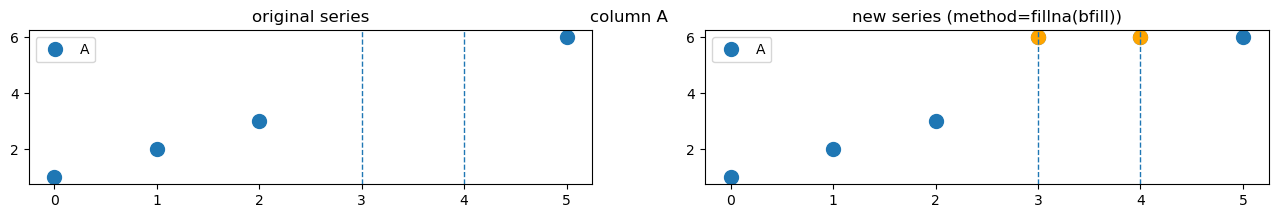

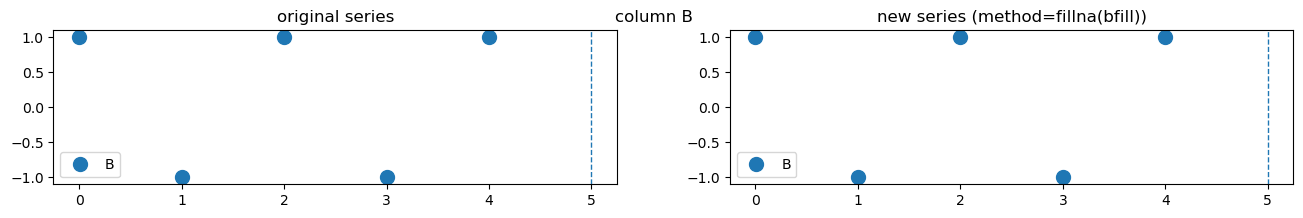

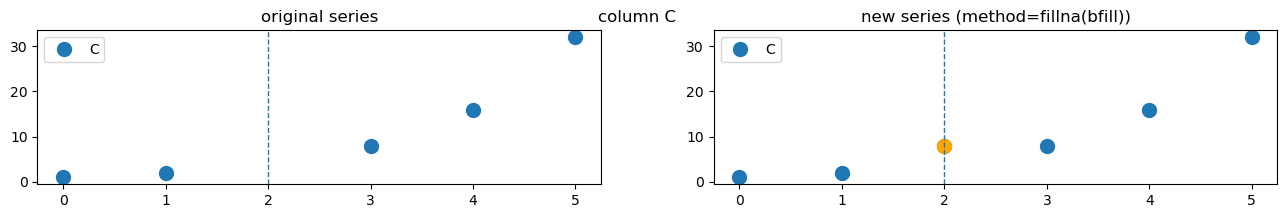

In [24]:
plot_compare(df_ffill, 'A', 'method=fillna(bfill)')
plot_compare(df_ffill, 'B', 'method=fillna(bfill)')
plot_compare(df_ffill, 'C', 'method=fillna(bfill)')

### mode for categorical values

In [25]:
df[['D', 'E']].describe()

,D,E
count,5,5
unique,2,4
top,male,red
freq,3,2


In [26]:
most_frequent = df[['D', 'E']].mode().head(1)
print(most_frequent)

# Transform dataframe's first row into a dictionary
most_frequent = {c: most_frequent[c].item() for c in most_frequent.columns}
print(most_frequent)

df.fillna(most_frequent).style.apply(highlight_nans, axis=0)

      D    E
0  male  red
{'D': 'male', 'E': 'red'}


,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,nan,male,red
3,nan,-1.000000,8.000000,female,green
4,nan,1.000000,16.000000,male,red
5,6.000000,nan,32.000000,male,yellow


### Interpolation
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
#### Forward padding

In [27]:
df.interpolate(method='pad', limit=1).style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,2.000000,male,red
3,3.000000,-1.000000,8.000000,female,green
4,nan,1.000000,16.000000,female,green
5,6.000000,1.000000,32.000000,male,yellow


#### Backward

In [28]:
df.interpolate(method='bfill', limit=2).style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,8.000000,male,red
3,6.000000,-1.000000,8.000000,female,green
4,6.000000,1.000000,16.000000,male,yellow
5,6.000000,nan,32.000000,male,yellow


#### Linear

In [29]:
df.interpolate(method='linear').style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,5.000000,male,red
3,4.000000,-1.000000,8.000000,female,green
4,5.000000,1.000000,16.000000,None,None
5,6.000000,1.000000,32.000000,male,yellow


#### Quadratic

In [30]:
df.interpolate(method='quadratic').style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,3.945946,male,red
3,4.000000,-1.000000,8.000000,female,green
4,5.000000,1.000000,16.000000,None,None
5,6.000000,nan,32.000000,male,yellow


#### Quadratic interpolation with a different index

In [31]:
df.set_index(np.square(df.index)).interpolate(method='quadratic').style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
4,3.000000,1.000000,4.444847,male,red
9,3.841270,-1.000000,8.000000,female,green
16,4.885714,1.000000,16.000000,None,None
25,6.000000,nan,32.000000,male,yellow


#### Polynomial interpolation of order 3

In [32]:
df.interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,3.928571,male,red
3,4.000000,-1.000000,8.000000,female,green
4,5.000000,1.000000,16.000000,None,None
5,6.000000,nan,32.000000,male,yellow


#### Polynomial interpolation of order 3 with a different index

In [33]:
df.set_index(np.square(df.index)).interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
4,3.000000,1.000000,4.408574,male,red
9,0.285714,-1.000000,8.000000,female,green
16,-4.714286,1.000000,16.000000,None,None
25,6.000000,nan,32.000000,male,yellow


#### interpolating using nearest
finding the value of D

In [34]:
temp = df.reset_index()

# we need B without Nan cell to work as index for interpolation
temp = temp.loc[df.B.notna(), ['index', 'B', 'D']]
temp = temp.set_index('B')
temp

,index,D
B,,
1.0,0,male
-1.0,1,female
1.0,2,male
-1.0,3,female
1.0,4,None


In [35]:
#creat one hot encoding for is-male
male_ohe = {'male': 1, 'female': 0, None: None}
temp['is_male'] = temp['D'].apply(lambda x:male_ohe[x]).astype(float)
temp

,index,D,is_male
B,,,
1.0,0,male,1.0
-1.0,1,female,0.0
1.0,2,male,1.0
-1.0,3,female,0.0
1.0,4,None,NaN


In [36]:
#use nearest to determine Nan value of is_male (B as the nearest index)
temp = temp.interpolate(method='nearest')
temp

,index,D,is_male
B,,,
1.0,0,male,1.0
-1.0,1,female,0.0
1.0,2,male,1.0
-1.0,3,female,0.0
1.0,4,None,1.0


In [37]:
#give the obtained value of is_male to D
# we reverse the one hot encoded at is_male column to fill column D
male_ohe_r = {v:k for k,v in male_ohe.items()}
temp['D'] = temp['is_male'].apply(lambda x: male_ohe_r[x])
temp

,index,D,is_male
B,,,
1.0,0,male,1.0
-1.0,1,female,0.0
1.0,2,male,1.0
-1.0,3,female,0.0
1.0,4,male,1.0


In [38]:
#set the index back to index
temp = temp.set_index('index')
temp

,D,is_male
index,,
0,male,1.0
1,female,0.0
2,male,1.0
3,female,0.0
4,male,1.0


In [39]:
#add the new D back to the df
df.loc[df.index.isin(temp.index), 'D'] = temp.D
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,NaN,male,red
3,NaN,-1.0,8.0,female,green
4,NaN,1.0,16.0,male,None
5,6.0,NaN,32.0,male,yellow


In [40]:
#use D to predict B using the same method as before
#set D as new index, only view B
temp = df.reset_index()

temp = temp.loc[df.D.notna(), ['index', 'B', 'D']]
temp = temp.set_index('D')
temp

,index,B
D,,
male,0,1.0
female,1,-1.0
male,2,1.0
female,3,-1.0
male,4,1.0
male,5,NaN


In [41]:
temp.reset_index(inplace=True)
temp

,D,index,B
0,male,0,1.0
1,female,1,-1.0
2,male,2,1.0
3,female,3,-1.0
4,male,4,1.0
5,male,5,NaN


In [42]:
# use the relationship between D and B to recreate B. 
male_ohe = {'male': 1, 'female': -1, None: None}
temp['B'] = temp['D'].apply(lambda x: male_ohe[x]).astype(float)
temp

,D,index,B
0,male,0,1.0
1,female,1,-1.0
2,male,2,1.0
3,female,3,-1.0
4,male,4,1.0
5,male,5,1.0


In [43]:
#add B to df
df.loc[df.index.isin(temp.index), 'B'] = temp.B
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,NaN,male,red
3,NaN,-1.0,8.0,female,green
4,NaN,1.0,16.0,male,None
5,6.0,1.0,32.0,male,yellow


In [44]:
# linear interpolation for A and quadratic interpolation for C are best
df = df.assign(
        A=df['A'].interpolate(method='linear'),
        B=df['B'],
        C=df['C'].interpolate(method='quadratic'),
        D=df['D']
    )

df.style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,3.945946,male,red
3,4.000000,-1.000000,8.000000,female,green
4,5.000000,1.000000,16.000000,male,None
5,6.000000,1.000000,32.000000,male,yellow


### Predicting E
using rgb to convert colours into numericla values

In [45]:
from matplotlib.patches import Rectangle

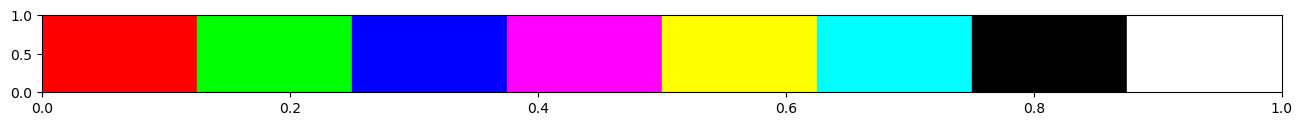

In [46]:
plt.figure(figsize=(16, 1))
ax = plt.subplot(111)
colors = {
    'red':     (1,0,0),
    'green':   (0,1,0),
    'blue':    (0,0,1),
    'magenta': (1,0,1),
    'yellow':  (1,1,0),
    'cyan':    (0,1,1),
    'black':   (0,0,0),
    'white':   (1,1,1),
}

col, row = 0., 0.
for name, c in colors.items():
    ax.add_patch(Rectangle((col, row), 1, 1, color=c))
    col += 1/len(colors)
plt.show()

In [47]:
def rgb_part(x, rgb_index):
    global colors
    if x == None: return None
    c = colors[x]
    return c[rgb_index]

df['E_r'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=0))
df['E_g'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=1))
df['E_b'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=2))
df

,A,B,C,D,E,E_r,E_g,E_b
0,1.0,1.0,1.000000,male,red,1.0,0.0,0.0
1,2.0,-1.0,2.000000,female,blue,0.0,0.0,1.0
2,3.0,1.0,3.945946,male,red,1.0,0.0,0.0
3,4.0,-1.0,8.000000,female,green,0.0,1.0,0.0
4,5.0,1.0,16.000000,male,None,NaN,NaN,NaN
5,6.0,1.0,32.000000,male,yellow,1.0,1.0,0.0


In [48]:
#looking at only male data
df[df.D == 'male']

,A,B,C,D,E,E_r,E_g,E_b
0,1.0,1.0,1.000000,male,red,1.0,0.0,0.0
2,3.0,1.0,3.945946,male,red,1.0,0.0,0.0
4,5.0,1.0,16.000000,male,None,NaN,NaN,NaN
5,6.0,1.0,32.000000,male,yellow,1.0,1.0,0.0


In [49]:
#one hot encode D and remove D and E
cat_dummies = pd.get_dummies(df[['D']], drop_first=True)
X = pd.concat([df.drop(columns = ['D', 'E']), cat_dummies], axis=1)
X

,A,B,C,E_r,E_g,E_b,D_male
0,1.0,1.0,1.000000,1.0,0.0,0.0,True
1,2.0,-1.0,2.000000,0.0,0.0,1.0,False
2,3.0,1.0,3.945946,1.0,0.0,0.0,True
3,4.0,-1.0,8.000000,0.0,1.0,0.0,False
4,5.0,1.0,16.000000,NaN,NaN,NaN,True
5,6.0,1.0,32.000000,1.0,1.0,0.0,True


#### Imputation through modelling

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,A,B,C,E_r,E_g,E_b,D_male
0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
1,0.2,0.0,0.032258,0.0,0.0,1.0,0.0
2,0.4,1.0,0.095031,1.0,0.0,0.0,1.0
3,0.6,0.0,0.225806,0.0,1.0,0.0,0.0
4,0.8,1.0,0.483871,NaN,NaN,NaN,1.0
5,1.0,1.0,1.000000,1.0,1.0,0.0,1.0


In [51]:
from sklearn.impute import KNNImputer

# based of nearest 3 neighbors
imputer = KNNImputer(n_neighbors=3)

In [54]:
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
# We verify there are no nan values in any column nor a single row

# X.isna().any(0).sum(), X.isna().any(1).sum()
# (0, 0)
X = pd.DataFrame(scaler.inverse_transform(X), columns = X.columns)
X

,A,B,C,E_r,E_g,E_b,D_male
0,1.0,1.0,1.000000,1.0,0.000000,0.0,1.0
1,2.0,-1.0,2.000000,0.0,0.000000,1.0,0.0
2,3.0,1.0,3.945946,1.0,0.000000,0.0,1.0
3,4.0,-1.0,8.000000,0.0,1.000000,0.0,0.0
4,5.0,1.0,16.000000,1.0,0.333333,0.0,1.0
5,6.0,1.0,32.000000,1.0,1.000000,0.0,1.0


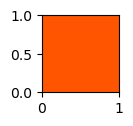

In [56]:
plt.figure(figsize=(1,1))
plt.subplot(111).add_patch(Rectangle((0, 0), 1, 1, color=(1,1/3,0))); #4th row, almost clode to red

In [57]:
# we save it for later comparison
version_1 = X.copy()
X['E'] = df['E']
X.loc[X.index == 4, 'E'] = 'red'
X.drop(columns=['E_r', 'E_g', 'E_b'], inplace=True)
X['D'] = X['D_male'].apply(lambda x: 'male' if x==1 else 'female')
X = X.drop(columns=['D_male'])
version_1 = X.copy()
X

,A,B,C,E,D
0,1.0,1.0,1.000000,red,male
1,2.0,-1.0,2.000000,blue,female
2,3.0,1.0,3.945946,red,male
3,4.0,-1.0,8.000000,green,female
4,5.0,1.0,16.000000,red,male
5,6.0,1.0,32.000000,yellow,male


In [58]:
def best_color_for(neighbors):
    scaler = MinMaxScaler()
    X = pd.concat([df.drop(columns=['D', 'E']), cat_dummies], axis=1)
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    imputer = KNNImputer(n_neighbors=neighbors)
    X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
    c = tuple(X.loc[X.index == 4, ['E_r', 'E_g', 'E_b']].head(1).values.flatten())
    print(f'Neighbors: {neighbors} Imputed color: {c}')
    plt.figure(figsize=(1,1))
    plt.subplot(111).add_patch(Rectangle((0, 0), 1, 1, color=c))
    plt.show()

Neighbors: 1 Imputed color: (1.0, 1.0, 0.0)


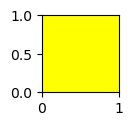

Neighbors: 2 Imputed color: (1.0, 0.5, 0.0)


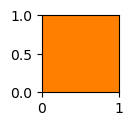

Neighbors: 3 Imputed color: (1.0, 0.3333333333333333, 0.0)


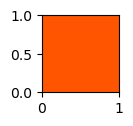

Neighbors: 4 Imputed color: (0.75, 0.5, 0.0)


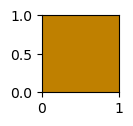

Neighbors: 5 Imputed color: (0.6, 0.4, 0.2)


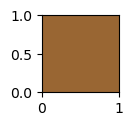

In [59]:
for neighbors in range(1, 6):
    best_color_for(neighbors)

Based on number of neighbours, colors change but everything is around red tone

In [60]:
version_1.style.apply(highlight_nans, axis=0)

,A,B,C,E,D
0,1.000000,1.000000,1.000000,red,male
1,2.000000,-1.000000,2.000000,blue,female
2,3.000000,1.000000,3.945946,red,male
3,4.000000,-1.000000,8.000000,green,female
4,5.000000,1.000000,16.000000,red,male
5,6.000000,1.000000,32.000000,yellow,male


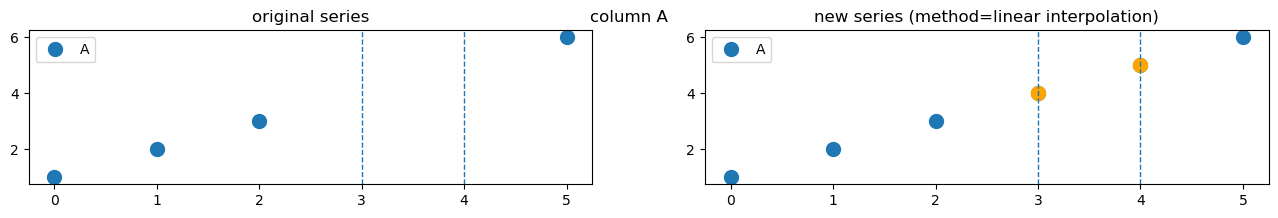

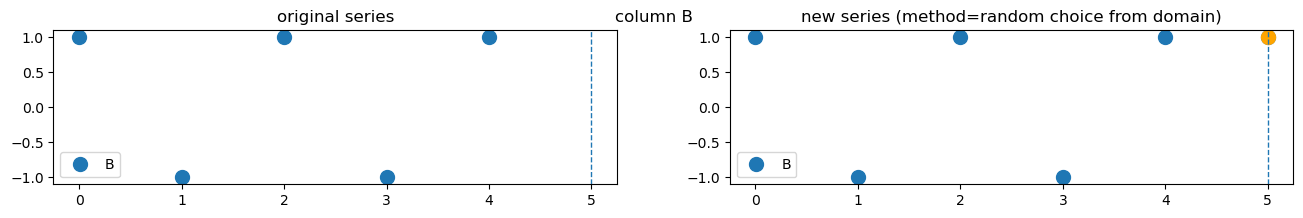

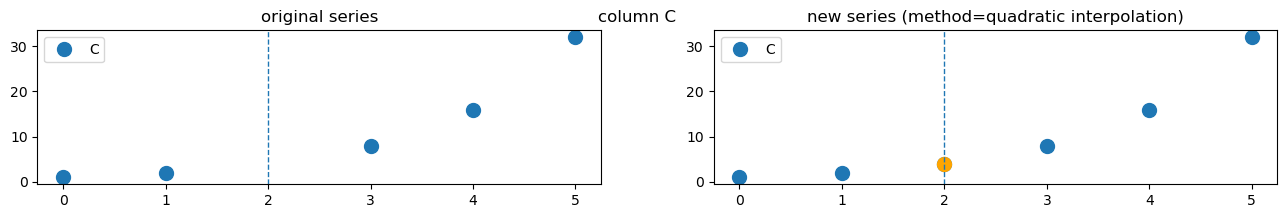

In [61]:
plot_compare(version_1, 'A', 'method=linear interpolation')
plot_compare(version_1, 'B', 'method=random choice from domain')
plot_compare(version_1, 'C', 'method=quadratic interpolation')

what if we used kNN for the whole table?

In [62]:
df = get_data()
# one hot encode D
D_dummies = pd.get_dummies(df[['D']], drop_first=True)
# one hot encode color in a better way
df['E_r'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=0))
df['E_g'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=1))
df['E_b'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=2))
# we drop categorical variables and we add one hot encoded one
X = pd.concat([df.drop(columns=['D', 'E']), D_dummies], axis=1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
imputer = KNNImputer(n_neighbors=3)
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
X = pd.DataFrame(scaler.inverse_transform(X), columns = X.columns)
X['D'] = X['D_male'].apply(lambda x: 'male' if x==1 else 'female')
X = X.drop(columns=['D_male'])
X

,A,B,C,E_r,E_g,E_b,D
0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,male
1,2.0,-1.000000,2.000000,0.000000,0.000000,1.000000,female
2,3.0,1.000000,16.333333,1.000000,0.000000,0.000000,male
3,3.0,-1.000000,8.000000,0.000000,1.000000,0.000000,female
4,2.0,1.000000,16.000000,0.333333,0.333333,0.333333,female
5,6.0,0.333333,32.000000,1.000000,1.000000,0.000000,male


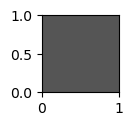

In [63]:
plt.figure(figsize=(1,1))
plt.subplot(111).add_patch(Rectangle((0, 0), 1, 1, color=(1/3,1/3,1/3))); #gray

In [64]:
X['E'] = df['E']
X.loc[X.index == 4, 'E'] = 'gray'
X.drop(columns=['E_r', 'E_g', 'E_b'], inplace=True)
version_2 = X.copy()
version_2.style.apply(highlight_nans, axis=0)

,A,B,C,D,E
0,1.000000,1.000000,1.000000,male,red
1,2.000000,-1.000000,2.000000,female,blue
2,3.000000,1.000000,16.333333,male,red
3,3.000000,-1.000000,8.000000,female,green
4,2.000000,1.000000,16.000000,female,gray
5,6.000000,0.333333,32.000000,male,yellow


Column A breaks the pattern<br>
Column B breaks the variable domain (-1, 1)<br>
Column C breaks the pattern<br>
Column D loses relation with column B<br>
Column E loses the red pattern for most colors and even with relation to columns D and B.<br>